In [287]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1> Load and Clean Data </h1>

In [293]:
dataset = pd.read_excel('proj1Dataset.xlsx');
dataset.head()

,Weight,Horsepower
0,3504,130.0
1,3693,165.0
2,3436,150.0
3,3433,150.0
4,3449,140.0


Text(0,0.5,'Horsepower')

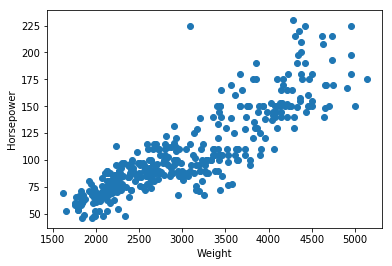

In [294]:
# Plot the Data
plt.scatter(dataset['Weight'],dataset['Horsepower'])
plt.xlabel('Weight')
plt.ylabel('Horsepower')

In [334]:
# Convert Data to Numpy Arrays
predictors = np.array(dataset['Weight'])
targets = np.array(dataset['Horsepower'])

In [335]:
# Clean Up Data: Ommiting Non Finite Values or missing data
if(np.sum(~np.isfinite(targets))):
    clean_indices = np.argwhere(np.isfinite(targets))
    predictors = predictors[clean_indices]
    targets = targets[clean_indices]
# Normalize Data
# mean_x = np.mean(predictors)
# mean_t = np.mean(targets)
# predictors = predictors / mean_x
# targets = targets / mean_t

In [336]:
# Design Matrix X
array_of_ones = np.ones(len(predictors)).reshape(400,1)
X = np.append(predictors,array_of_ones,axis=1)

In [337]:
# Design Matrix t
t = targets

<h1> Closed Form Solution </h1>

In [338]:
# Closed Form Predicted Values
predictions_closed_form = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),t)

In [339]:
x_mesh = np.linspace(1500,6000,10000)
y_closed_form = x_mesh*predictions_closed_form[0] + predictions_closed_form[1]

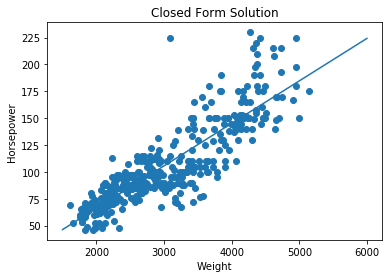

In [340]:
# Plot Closed Form Solution
plt.scatter(dataset['Weight'],dataset['Horsepower'])
plt.plot(x_mesh,y_closed_form)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Closed Form Solution')
plt.show()

<h1> Gradient Descent Solution </h1>

In [425]:
# Initialze Random Weigths and other parameters
w = np.random.randn(2,1)
learning_rate = 1e-10
epochs = 10
X2 = X.T # To insure correct dimensions
t2 = t.T # To insure correct dimensions

In [426]:
def calculate_output(w,X):
    return np.dot(w.T,X)
def cost_function(w,X,t):
    y = calculate_output(w,X)
    cost = np.sum(np.power(y - t,2))
    return cost

In [427]:
def calculate_gradient(w,X,t):
    y = calculate_output(w,X)
    dw1 = np.sum(-2*np.dot(X,(t-y).T))
    dw0 = np.sum(-2*(t-y).T)
    dw = [dw1, dw0]
    return np.array(dw).reshape(2,1)

In [428]:
def train(w,X,t,epochs,learning_rate,printCost=False,plotCost=False):
    costArr = []
    for i in range(epochs):
        costArr.append(cost_function(w,X,t))
        if printCost:
            print('Cost: ' + str(costArr[i]))
        grad = calculate_gradient(w,X2,t2)
        w -= learning_rate*grad
    if plotCost:
        plt.plot(list(range(epochs)),costArr)
        

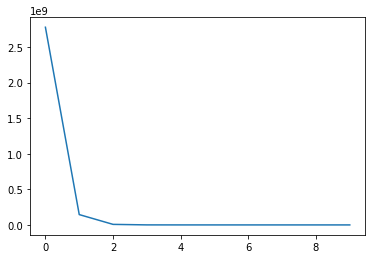

In [429]:
train(w,X2,t2,epochs,learning_rate,0,1)

Text(0.5,1,'Gradient Decent Solution')

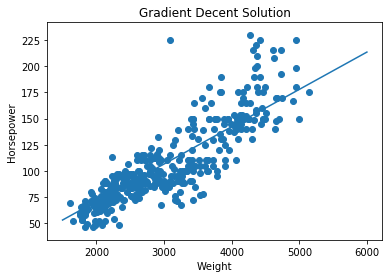

In [430]:
y = x_mesh*w[0] + w[1]
plt.plot(x_mesh,y)
plt.scatter(dataset['Weight'],dataset['Horsepower'])
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Gradient Decent Solution')

Closed Form Weights: 
[[  0.03955133]
 [-13.04012986]]
Gradient Decent Weights: 
[[ 0.03566115]
 [-0.48358558]]


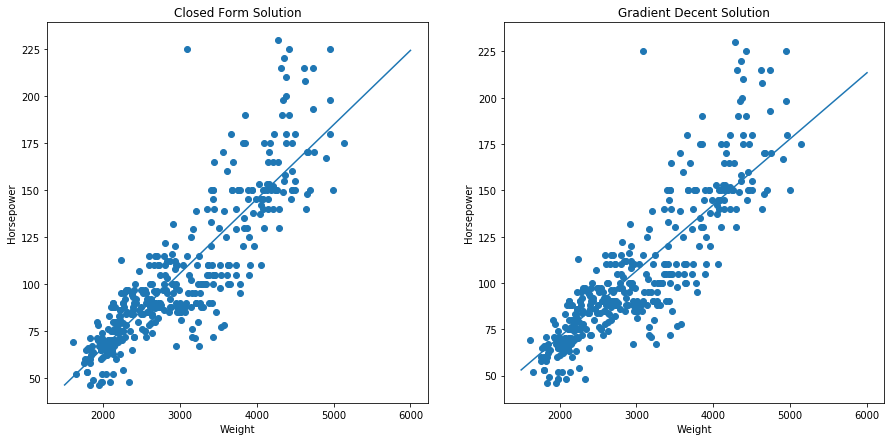

In [431]:
plt.subplots(2,1,figsize=(15,7))
plt.subplot(121)
plt.scatter(dataset['Weight'],dataset['Horsepower'])
plt.plot(x_mesh,y_closed_form)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Closed Form Solution')
# plt.show()
plt.subplot(122)
plt.plot(x_mesh,y)
plt.scatter(dataset['Weight'],dataset['Horsepower'])
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Gradient Decent Solution')



print('Closed Form Weights: \n' + str(predictions_closed_form))
print('Gradient Decent Weights: \n' + str(w))